# Let's start with langgraph

In [ ]:
from langgraph.graph import StateGraph, START, END

# Let's define a node

In [ ]:
def node_1(state):
    # procesamiento ...
    return {"message": "bye!", "longitud": len(state["message"])}

# Let's define a State

In [ ]:
from typing_extensions import TypedDict

class MyState(TypedDict):
    message: str
    longitud: int

In [ ]:
MyState(message="hola", longitud=10)

# Let's build our Graph

In [ ]:
graph_builder = StateGraph(MyState)

graph_builder.add_node("node 1", node_1)

graph_builder.add_edge(START, "node 1")
graph_builder.add_edge("node 1", END)

graph = graph_builder.compile()

In [ ]:
graph

In [ ]:
graph.invoke({"message": "holaassdfdsa!", "longitud": 100})

# Let's define a reducer

In [ ]:
from langgraph.graph import StateGraph, START, END
import operator
from typing import Annotated
from typing_extensions import TypedDict

class MyState(TypedDict):
    message: Annotated[str, operator.add]

def node_1(state):
    return {"message": " james!"}

def node_2(state):
    return {"message": " how are you?"}

In [ ]:
graph_builder = StateGraph(MyState)

graph_builder.add_node("node_1", node_1)
graph_builder.add_node("node_2", node_2)

graph_builder.add_edge(START, "node_1")
graph_builder.add_edge("node_1", "node_2")
graph_builder.add_edge("node_2", END)

graph = graph_builder.compile()

In [ ]:
graph.invoke({"message": "hey"})

# Let's add a conditional edge

In [1]:
from langgraph.graph import StateGraph, START, END
import operator
from typing import Annotated
from typing_extensions import TypedDict

class MyState(TypedDict):
    message: Annotated[str, operator.add]

def node_1(state):
    return {"message": " james!"}

def node_2(state):
    return {"message": " how are you?"}

def node_3(state):
    return {"message": " it's all ok?"}

In [2]:
from random import random
from typing import Literal

def take_a_path(state) -> Literal["node_2", "node_3"]:
    if random() < 0.5:
        return "node_2"
    
    return "node_3"


graph_builder = StateGraph(MyState)

graph_builder.add_node("node_1", node_1)
graph_builder.add_node("node_2", node_2)
graph_builder.add_node("node_3", node_3)

graph_builder.add_edge(START, "node_1")
graph_builder.add_conditional_edges("node_1", take_a_path)
graph_builder.add_edge("node_2", END)
graph_builder.add_edge("node_3", END)


graph = graph_builder.compile()

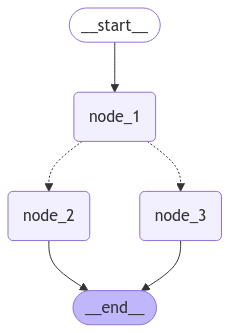

In [3]:
graph

In [18]:
graph.invoke({"message": "hi"})

{'message': 'hi james! how are you?'}

# Let's build a basic chatbot

In [19]:
from dotenv import load_dotenv

load_dotenv()

True

In [20]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0,
)

In [21]:
from langchain_core.messages import HumanMessage, AIMessage

class ChatbotState(TypedDict):
    user_request: str
    answer: str

def chatbot(state):
    user_request = state["user_request"]
    ai_answer: AIMessage = llm.invoke([HumanMessage(content=user_request)])

    return {"answer": ai_answer.content}


graph_builder = StateGraph(ChatbotState)

graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

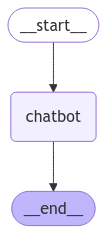

In [22]:
graph

In [23]:
graph.invoke({"user_request": "hi!"})

{'user_request': 'hi!', 'answer': 'Hello! How can I assist you today?'}

# Let's use a better state

In [ ]:
from langgraph.graph.message import add_messages, MessagesState

class State(TypedDict):
    messages: Annotated[list, add_messages]

def chatbot(state):
    ai_answer = llm.invoke(state["messages"])

    return {"messages": [ai_answer]}


graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

In [ ]:
graph.invoke({"messages": [("user", "hi!")]})